In [3]:
import numpy as np
import pandas as pd
import sys
import warnings

sys.path.insert(1, '../src/')

from guara.modeling.supervised_modelz import SupervisedModelz
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

seed = 42
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_parquet('../data/stage/3m/features_gold.parquet')
df = df.drop('consumer_id', axis=1)

In [5]:
categorical_features = [
    'mode_rating_reason_3m', 'mode_channel_3m', 'mercadopago_id', 'allow_promos'
]
numerical_features = [
    'mercadopago_id', 'allow_promos', 'total_sent_pushs_1m', 'total_open_pushs_1m',
    'total_pushs_bounced_1m', 'total_pushs_bounced_3m', 'total_emails_open_1m',
    'total_emails_open_3m', 'total_emails_sent_1m', 'total_emails_sent_3m', 'distinct_reason_1m',
    'distinct_reason_3m', 'max_diff_total_ratings', 'distinct_voucher_id_1m',
    'trend_redeemed_vouchers', 'distinct_reward_id_3m', 'max_diff_stores', 'mob',
    'mm_total_ratings_reason', 'mm_total_ratings', 'trend_total_ratings', 'mean_rating_1m',
    'mean_rating_3m', 'mm_redeemed_vouchers', 'mm_vouchers',
    'sum_redeemed_discount_amount_3m', 'p_discount_1m', 'mean_total_value_3m',
    'sum_total_discont_3m', 'mm_transactions_partners',
    'mean_redeemed_discount_amount_3m',
    'sum_loyalty_discount_amount_1m', 'mm_loyalty_amount', 'max_num_comments_3m',
    'tickets_1m', 'tickets_3m', 'sum_bad_rating_score_tickets'
]
target_column = 'target'

In [6]:
df[numerical_features] = df[numerical_features].astype(float)

In [7]:
base_model_features = numerical_features
selected_features = ['total_emails_open_1m', 'total_sent_pushs_1m', 'total_open_pushs_1m', 'distinct_reward_id_3m', 'mm_total_ratings_reason', 'max_diff_total_ratings', 'sum_loyalty_discount_amount_1m', 'max_num_comments_3m', 'total_pushs_bounced_3m', 'total_emails_sent_1m', 'mm_loyalty_amount', 'trend_redeemed_vouchers', 'mob', 'mean_rating_1m', 'trend_total_ratings', 'max_diff_stores', 'mm_total_ratings', 'sum_redeemed_discount_amount_3m', 'mean_redeemed_discount_amount_3m', 'mean_total_value_3m', 'allow_promos', 'sum_bad_rating_score_tickets', 'distinct_reason_1m', 'total_emails_sent_3m', 'mercadopago_id', 'tickets_3m', 'tickets_1m', 'distinct_voucher_id_1m', 'mean_rating_3m', 'total_pushs_bounced_1m', 'p_discount_1m', 'distinct_reason_3m', 'total_emails_open_3m']
base_model_features = selected_features

In [8]:
scaler = preprocessing.StandardScaler().fit(df[base_model_features])
X = scaler.transform(df[base_model_features])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=seed)

In [11]:
print('Target Distribuition training sample')
print(y_train_1.shape[0])
print(y_train_1.value_counts(normalize=True))
print('Target Distribuition validation sample')
print(y_val.shape[0])
print(y_val.value_counts(normalize=True))
print('Target Distribuition test sample')
print(y_test.shape[0])
print(y_test.value_counts(normalize=True))

Target Distribuition training sample
3239
1    0.637234
0    0.362766
Name: target, dtype: float64
Target Distribuition validation sample
810
1    0.67037
0    0.32963
Name: target, dtype: float64
Target Distribuition test sample
1013
1    0.649556
0    0.350444
Name: target, dtype: float64


## Training Base Model

In [12]:
md = SupervisedModelz('linear', 'binary')

params = {
    'max_iter': 100,
    'solver': 'lbfgs',#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    'penalty': 'l2'#‘l1’, ‘l2’, ‘elasticnet’, ‘none’
}

model = md.fit(X_train_1, None, y_train_1, None, params)

Treinando o modelo LINEAR, objetivo BINARY... 

Modelo treinado em 0.0 minutos 



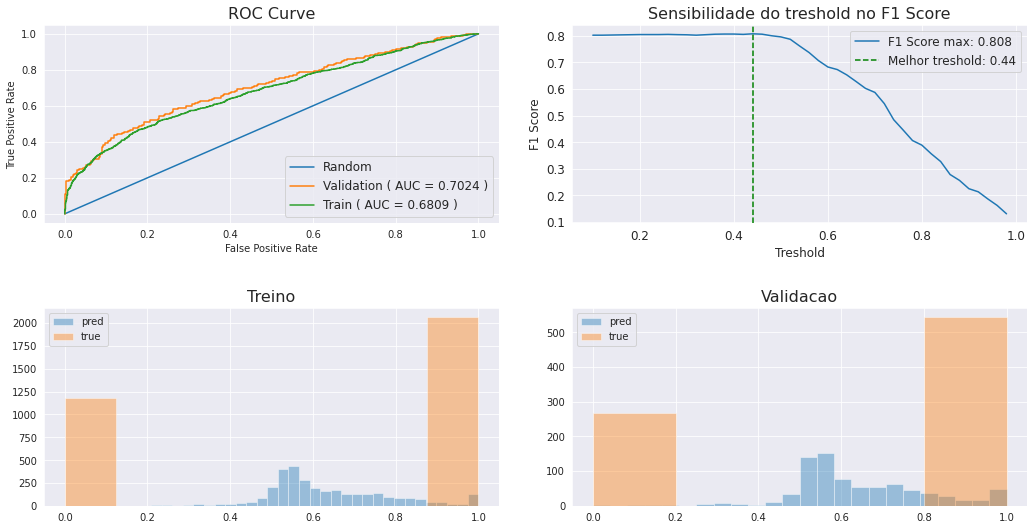

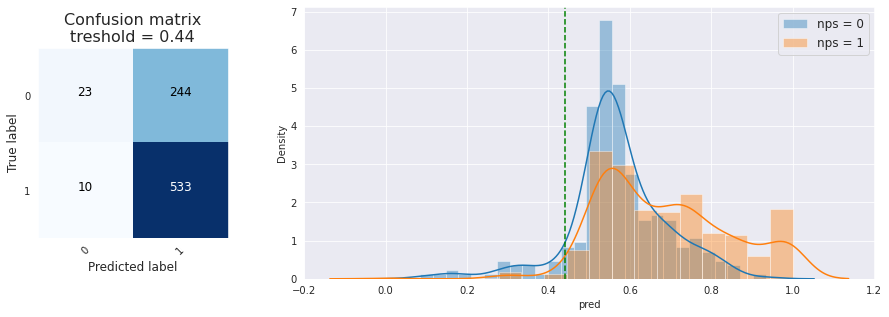


              precision    recall  f1-score   support

           0       0.70      0.09      0.15       267
           1       0.69      0.98      0.81       543

    accuracy                           0.69       810
   macro avg       0.69      0.53      0.48       810
weighted avg       0.69      0.69      0.59       810



In [20]:
ytrain_pred = md.predict(X_train_1)
yval_pred = md.predict(X_val)

md.evaluation_plots(y_train_1.values, ytrain_pred, y_val.values, yval_pred)

In [21]:
metrics = ['F1', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall']
#metrics = ['ROC_AUC']

print('TREINO:\n')
metrics_train = md.metrics_print(y_train_1.values, ytrain_pred, metrics)

print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(y_val.values, yval_pred, metrics)
#y_val.values, yval_pred

TREINO:

|     F1 |   Accuracy |   ROC_AUC |   Precision |   Recall |
|--------|------------|-----------|-------------|----------|
| 0.7787 |     0.6462 |    0.5211 |      0.6474 |   0.9767 |

VALIDACAO:

|     F1 |   Accuracy |   ROC_AUC |   Precision |   Recall |
|--------|------------|-----------|-------------|----------|
| 0.8076 |     0.6864 |    0.5339 |      0.6860 |   0.9816 |


Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


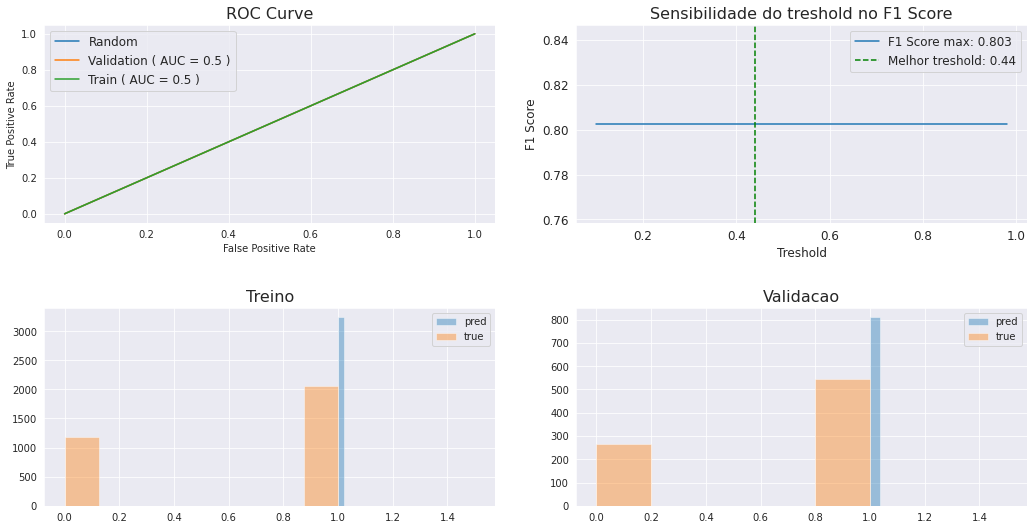

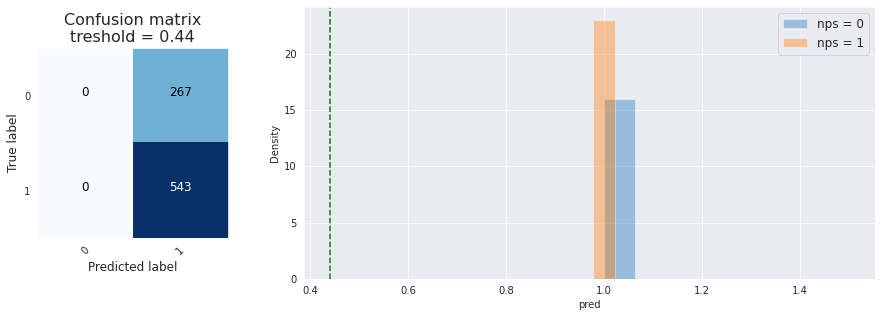


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       267
           1       0.67      1.00      0.80       543

    accuracy                           0.67       810
   macro avg       0.34      0.50      0.40       810
weighted avg       0.45      0.67      0.54       810



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [16]:
ytrain_pred = np.array([1]*ytrain_pred.shape[0])
yval_pred = np.array([1]*y_val.shape[0])

md.evaluation_plots(y_train_1.values, ytrain_pred, y_val.values, yval_pred)

In [19]:
metrics = ['F1', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall']
#metrics = ['ROC_AUC']

print('TREINO:\n')
metrics_train = md.metrics_print(y_train_1.values, ytrain_pred, metrics)

print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(y_val.values, yval_pred, metrics)
#y_val.values, yval_pred

TREINO:

|     F1 |   Accuracy |   ROC_AUC |   Precision |   Recall |
|--------|------------|-----------|-------------|----------|
| 0.7784 |     0.6372 |    0.5000 |      0.6372 |   1.0000 |

VALIDACAO:

|     F1 |   Accuracy |   ROC_AUC |   Precision |   Recall |
|--------|------------|-----------|-------------|----------|
| 0.8027 |     0.6704 |    0.5000 |      0.6704 |   1.0000 |


#### Base model with PyCaret

In [25]:
#setting the experiment
experiment = setup(df, target='target', categorical_features=categorical_features, \
                   fix_imbalance=True, fold=3)

#show the best model and their statistics
best_model = compare_models()

,Description,Value
0,session_id,1347
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5062, 41)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


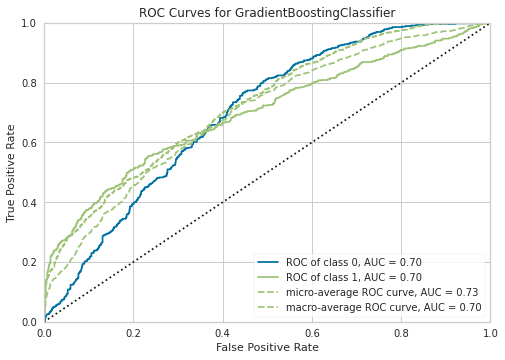

In [34]:
lr = create_model('gbc')
tuned_lr = tune_model(lr, fold=4, n_iter=400, optimize='AUC')
plot_model(lr) 

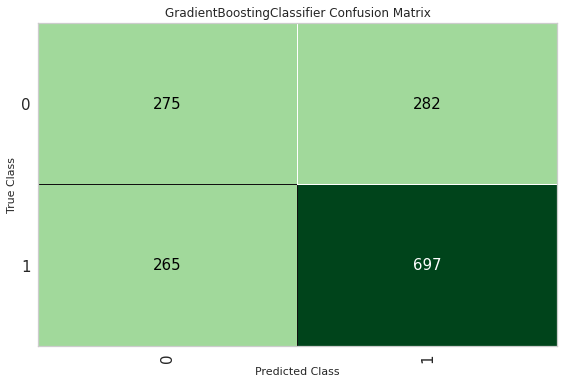

In [32]:
plot_model(lr, plot = 'confusion_matrix')

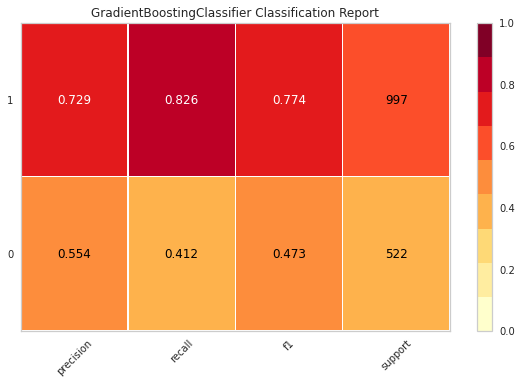

In [17]:
plot_model(lr, plot = 'class_report') 